**Цель**: применить на практике методы по оценке качества данных.

Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

Получите и загрузите данные.

Удалите все пропущенные значения и категориальные переменные. 

Обучите модель. 

Выберете и посчитайте метрику качества.

Снова загрузите полные данные.

Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

*Попробуйте математически преобразовать признак Age.
Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.
Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest

Получите и загрузите данные

In [4]:
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [5]:

data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data = data[pd.isnull(data['Age']) == 0]
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   714 non-null    int64  
 3   Parch   714 non-null    int64  
 4   Fare    714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [8]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.741700
75%,3.000000,38.000000,1.000000,1.000000,33.375000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [9]:
y = data['Survived']
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

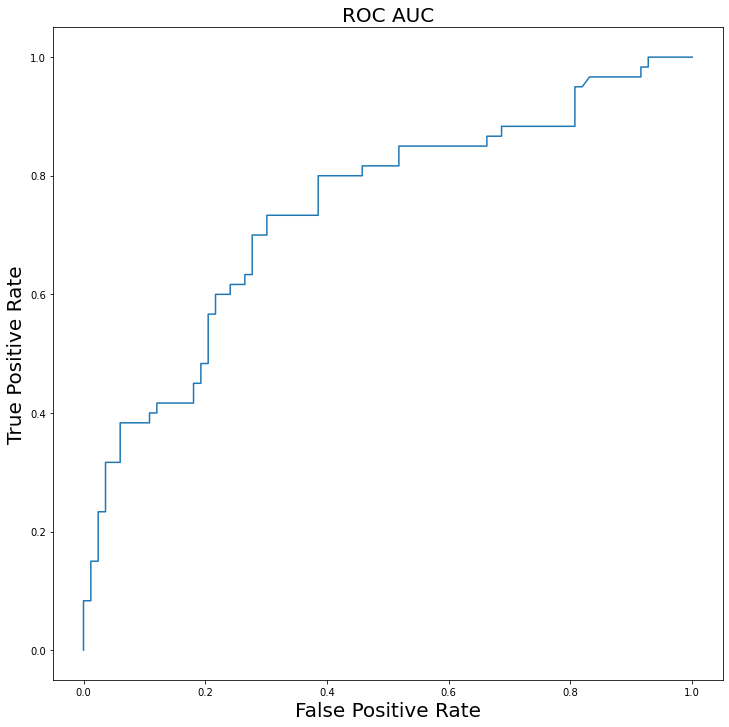

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

In [12]:
roc_auc_score(y_test, predictions[:, 1])

0.7412650602409638

Снова загрузите полные данные.

In [13]:
data = pd.read_csv("train.csv")

Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

PassengerId,  Name и  Ticket, как уникальные и случайные исключаем. Cabin также уникален, и хотя он может коррелировать с благосостоянием пассажира, но у нас нет сведений о разделении номеров по классам их качества, кроме того, их всего заполнено 204 из исходных 891 пассажиров, что очень мало - номера кают тоже исключаем. Embarked мог бы оказать влияние,также возможна  корреляция с благосостоянием. Остальные признаки сохраняем, категориальные из них - преобразуем.

In [14]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [15]:
(data.isna().mean() * 100).round(2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64

Есть пропуски для возраста и данных о спасении. В случае двух человек неизвесто,в каком городе  севших на корабль (0.22%),  можно  заполнить модой - городом, где село больше всего пассажиров. Если просто удалить пропуски в Age, мы получим 19.87% потерь

In [16]:
emb_num = maxPassEmbarked = data.groupby('Embarked').count()['Fare']
emb_num

Embarked
C    168
Q     77
S    644
Name: Fare, dtype: int64

In [17]:
data.Embarked[data.Embarked.isnull()] = maxPassEmbarked[maxPassEmbarked == maxPassEmbarked.max()].index[0]

In [18]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


 Age  разумно будет заменить  медианным значением возраста из числа заполненных

In [19]:
medianAge = data[data.Age.notnull()]['Age'].median()
medianAge

28.0

In [20]:
data.Age[data.Age.isnull()] = medianAge
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [21]:
cat_columns = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=cat_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

Isolation Forest - это алгоритм обучения без учителя, который принадлежит к семейству ансамблевых деревьев решений. Этот подход отличается от иных методов. Он не пытается найти нормальную область данных, а затем идентифицировать все, что находится за пределами этой определенной области, как выброс или аномальное.Так как у нас распределение не нормальное, то метод нужен не опирающийся на тенденции среднего.

 https://digitrain.ru/articles/368904/
 
  https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf 

In [22]:
clf = IsolationForest( max_samples=891, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data)
len(np.where(preds == -1)[0])

264

*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

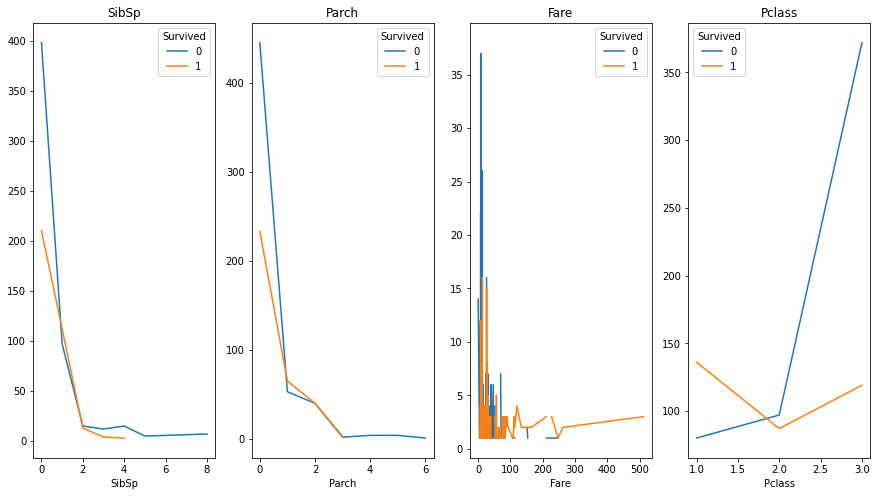

In [30]:
dt = pd.read_csv('train.csv')

fig, axes = plt.subplots(ncols=4)
fig.set_figheight(8)
fig.set_figwidth(15)
dt.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
dt.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')
dt.pivot_table('PassengerId', ['Fare'], 'Survived', 'count').plot(ax=axes[2], title='Fare')
dt.pivot_table('PassengerId', ['Pclass'], 'Survived', 'count').plot(ax=axes[3], title='Pclass')

С ростом числа родственников вероятность спастись  падает. Для людей с высокой стоимостью билета или высоким социальным статусом отношение числа спасшихся к числу погибших выше, чем у бедных.

*Попробуйте математически преобразовать признак Age.

Признак Age разделим на три категории - до 14 лет, от 14 до 30 лет и старше 30 лет

In [32]:
data.Age[data.Age < 14.0] = 1
data.Age[(data.Age >= 14.0) & (data.Age < 30.0)] = 2
data.Age[data.Age >= 30.0] = 3
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,1,0,7.2500,0,1,0,0,1
1,1,1,1.0,1,0,71.2833,1,0,1,0,0
2,1,3,1.0,0,0,7.9250,1,0,0,0,1
3,1,1,1.0,1,0,53.1000,1,0,0,0,1
4,0,3,1.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,13.0000,0,1,0,0,1
887,1,1,1.0,0,0,30.0000,1,0,0,0,1
888,0,3,1.0,1,2,23.4500,1,0,0,0,1
889,1,1,1.0,0,0,30.0000,0,1,1,0,0


Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


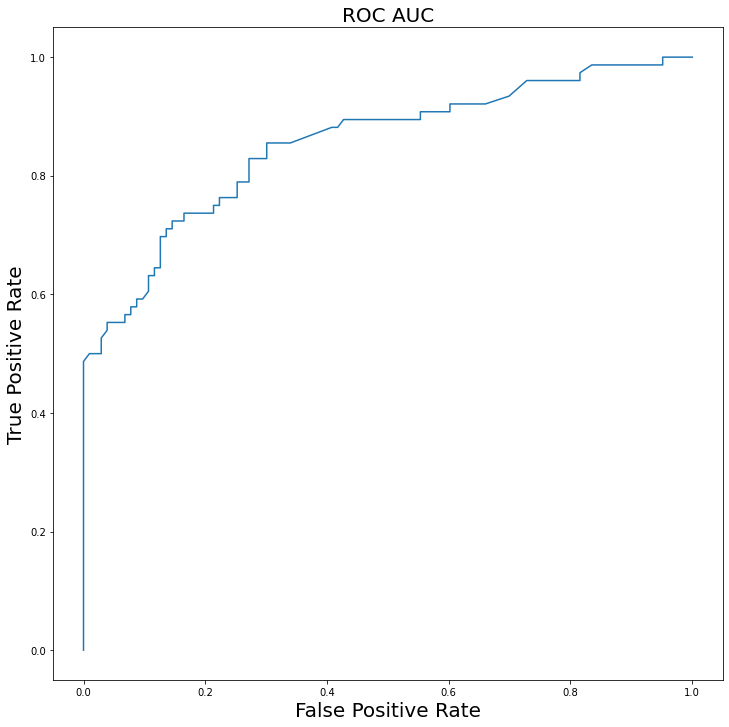

In [33]:
X = data.loc[:, data.columns != 'Survived']
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:, 1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

In [34]:
roc_auc_score(y_test, predictions[:, 1])

0.853474706182933

Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 

*Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Преобразования были описаны по ходу исследования. Использовались замены пропусков модой и медианой. Так как медиана более адаптирована к оценке данных с выбросами.

Модель с удалёнными пропусками оказалась менее продуктивной.

Целесообразнее заполнять пропуски нежели терять данные, если количество пропусков велико относительно данных.

Добрый день!
Спасибо за работу!

Оставляю обратную связь по пунктам:
1. С загрузкой всё отлично
2. С получением базового решения всё отлично.
3. .
4. Да, действительно, признаки PassengerId, Name, Ticket и Cabin выглядят так, что не должны влиять на целевое значение
5. Отлично, что решили пропуски в Embarked заменить на моду, а в признаке Age на медиану
6. Признак Sexfemale или Sexmale можно было удалить, тем самым оставив только один из них, т.к. они взаимозаменяемые
7. Выбросы нашли, но не удалили их из датасета
8. В ваших графиках лучше использовать не обычный plot, а plot(kind='bar'), к примеру, так будет наглядней отличия
9. Придумали интересный способ кодирования Age
10. Всё хорошо здесь
11. Отличные выводы!

Успехов!